# Files d'Attente (*Queues* or *Waiting Lines*)

**Objectifs :**

1. Simulation d'une file d'attente $M/M/1$
2. Visualisation de la convergence 


**Description**

Nous disposons de $n$ serveurs répondant aux attentes des clients. Le but est d'étudier le nombre de clients en attente, le temps moyen d'attente, etc. dans le système.

Nous ne considérerons ici que des *files d'attentes* dites *PAPS* (Premier Arrivé Premier Servi) ou *FCFS* (First Come First Served) ou *FIFO* (First In First Out), ce qui signiffiee que les clients sont servis dans l'ordre d'arrivée. Il existe des modèles sans cette hypothèse, mais nous ne les aborderons pas ici.

**Notation de Kendall**

Nous désignerons une file d'attente par la notation $A/B/m$ : 
* $A$ désigne la loi du temps écoulé entre deux arrivées; 
* $B$ désigne la loi du temps nécessaire pour répondre au client pour un serveur;
* $m$ représente le nombre de serveurs.

## Files $M/M/1$

Notons $T$ le temps écoulé entre deux arrivées de clients et $D$ la durée de réponse du serveur. Une modélisation classique de ces durées consiste à considérer qu'elles suivent des *lois exponentielles*. Nous supposerons ainsi que $T$ suit une loi $\mathcal{E}(\lambda)$ et que $D$ suit une loi $\mathcal{E}(\mu)$. Nous supposerons de plus ces deux durées indépendantes. La loi exponentielle étant désignée par la lettre $M$ ($M$ pour **M**arkovien), un tel modèle est appelé un modèle $M/M/1$.

Pour rappel :

|Nom de la loi|Ensemble des valeurs, $E$|Densité $f(x)$ si $x\in E$ et 0 sinon| Espérance | Variance |
|:-|:-:|:-:|:-:|:-:|
|$\mathcal{E}(\lambda), \lambda>0$ | $\mathbb{R}^+$ | $\lambda e^{-\lambda x}$ | $\frac{1}{\lambda}$ | $\frac{1}{\lambda}$ |

Ainsi, les temps moyens d'attente et de service valent $\frac{1}{\lambda}$ et $\frac{1}{\mu}$ respectivement. Le nombre
d'arrivées de clients est alors un *processus de Poisson* et le nombre moyen d'arrivées par unité de temps vaut $\lambda$. Les paramètres $\lambda$ et $\mu$ seront par la suite exprimés en minutes$^{-1}$.

Nous sommes alors amenés à étudier une *Chaîne de Markov continue*. Les états de cette chaîne correspondent au nombre de clients dans le système, dans la file d'attente ou en train d'être servi. On représente en général une telle chaîne par le schéma suivant :

<img src="img/queue-general.png" width="500">

A chaque étape, la longueur de la file varie au maximum de 1



Notons une relation entre la *loi de Poisson* et la *loi Exponentielle* :

La distribution de Poisson reflète le nombre d'occurrences d'un évènement dans une période de temps, tandis que la distribution exponentielle reflète le temps passé entre ces évènements. 

## Question 1. Simulation d'une file d'attente $M/M/1$ 

Nous souhaiterions implémenter une fonction `fileMM1` qui retourne l'évolution du système au cours du temps dans un modèle $M/M/1$ pendant un intervalle de temps de durée $d$.

Cette fonction aura pour paramètres d'entrée `lam`, `mu`, `d` où :
* `lam` est le paramètre de la loi exponentielle des arrivées,
* `mu` est le paramètre de la loi exponentielle des départs,
* `d` est le temps d'observation de la chaîne.

```
def fileMM1(lam, mu, d):
    """
    Modélise l'évolution du système au cours du temps comme une file d'attente M/M/1. 
    
    Keyword arguments:
    lam --  paramètre de la loi exponentielle des arrivées
    mu -- paramètre de la loi exponentielle des départs
    d -- temps d'observation de la chaîne
    
    Return:
    un dictionnaire contenant les éléments arrivee et depart reflétant les temps d'arrivées et de sorties des clients du système
    """
```

**Quelques astuces et contraintes:**
1. Afin de créer une réalisation d'une variable aléatoire qui suit une loi exponentielle, vous pouvez vous servir de [`numpy.random.exponential`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html), e.g.:
`np.random.exponential(scale=1/5, size=1)` pour le paramètre $\lambda = 5$. Ici, le paramètre `scale` est l'inverse de $\lambda$ (rate).
2. Vous devez générer un tableau (e.g. `numpy` array) avec les temps d'arrivées et un avec les temps de départs. Les arrivées étant indépendantes des départs, il vous est conseillé de faire un deux temps : 1. créer le tableau des arrivées et 2. créer le tableau des départs.
3. Pour construire les départs, deux cas sont à prendre en compte :
    * cas 1: soit la personne précédente est déjà partie, alors la requête est traitée tout de suite : *instant de départ = instant d'arrivée + temps de service*
    <img src="img/depart-case1.png" width="500">
    * cas 2 : soit la personne précédente n'est pas partie, alors le traitement de la requête débute quand elle s'en va : *instant de départ = instant de départ du précédent + temps de service*
    <img src="img/depart-case2.png" width="500">
4. Aucun temps dans aucun des 2 tableaux ne doit dépasser la durée d'observation $d$.
5. Les tableaux des arrivées et des départs étant possiblement de taille différentes, il vous ait demandé de retourner le résultat sous forme d'un dictionnaire, e.g. `queue = {'arrivees': arr, 'departs': dep}` où `arr` et `dep` sont les tableaux des arrivées et départs respectivement.

In [2]:
import numpy as np # calcul numérique
import matplotlib.pyplot as plt # graphiques
import pandas as pd # DataFrame

In [13]:

def fileMM1(lam, mu, d):

    # Génération des temps d'arrivée cumulés
    arrivees = []
    t = 0
    while t < d:
        t += np.random.exponential(scale=1/lam)
        if t < d:
            arrivees.append(t)
    arrivees = np.array(arrivees)

    # Génération des temps de service
    departs = []
    if len(arrivees) > 0:
        t_depart = 0
        for t_arr in arrivees:
            service_time = np.random.exponential(scale=1/mu)
            if t_arr > t_depart:
                # Le serveur est libre, le client est servi dès son arrivée
                t_depart = t_arr + service_time
            else:
                # Le serveur est occupé, le client doit attendre
                t_depart += service_time
            if t_depart < d:
                departs.append(t_depart)
            else:
                break
    departs = np.array(departs)

    return {'arrivees': arrivees, 'departs': departs}

resultat = fileMM1(lam=2, mu=3, d=10)
print("Arrivées :", resultat['arrivees'])
print("Départs :", resultat['departs'])

Arrivées : [0.22879814 0.76561556 1.43977905 3.42352409 3.65965354 3.82381465
 3.88189592 4.31436116 4.52819442 4.56717827 4.96070611 6.33097028
 7.40512522 7.53063787 7.85527807 8.06104457 8.09527466 8.34130581
 8.90786307 9.48159305 9.96578217]
Départs : [0.57030927 1.29682592 1.46546571 3.52176539 4.0268805  4.44340722
 5.03073895 5.42274031 5.63884352 5.86604991 6.14936357 7.05370448
 7.6489775  7.74774426 8.08057065 8.60470278 8.74953573 9.13772656
 9.18777133 9.50307409]


## Question 2. Evolution du nombre de clients dans le système 

### Modélisation du nombre de clients dans le système

Nous souhaitons maintenant modéliser l'évolution du nombre de clients dans le système. 

Considérons un exemple suivant. La file d'attente est donnée par les temps d'arrivées et départs suivants :

<img src="img/nb-clients-init-table.png" width="200">

Nous souhaitons étudier le nombre de clients dans le système. En partant du principe du *temps continue*, nous pouvons fixer les instants de temps où il y a un changement dans le système, i.e. une arrivée ou un départ :

<img src="img/nb-clients-time-axis-init.png" width="800">

Comme indiqué avant, un changement de l'état de système est soit une augmentation du nombre de clients dans le système par 1 ($+1$), soit une diminution du nombre de clients dans le système par 1 ($-1$).

Rajoutons ces types de changement sur le graphique :

<img src="img/nb-clients-time-axis-init-2.png" width="800">

A présent, on peut calculer le nombre de clients dans le système pour chaque instant comme la somme cumulative :

<img src="img/nb-clients-time-axis.png" width="800">

Autrement dit, on peut construire une table suivante :

<img src="img/nb-clients-final-table.png" width="700">


Pour la modélisation :

1. Vous devez récupérer les résultats de simulation de la file d'attente. A partir de ces données, vous pouvez construire deux tableaux : 
    - instants de temps de changements $temps$ 
    - nombre de clients $nb\_clients$ 
    tels qu'à chaque instant $temps_i$ on ait $nb\_clients_i$ clients dans la file.
2. Représentez le nombre de clients en fonction du temps.

```
def evolution(queue):
    """
    Modélise l'évolution du nombre de clients dans la file queue.
    
    Keyword arguments:
    queue -- dictionnaire contenant les temps des arrivées et départs de clients
    
    Return:
    un dictionnaire contenant les instants de temps et le nombre de clients correspondant dans le système
    """
```

**Quelques astuces :**

1. Quand un client arrive au serveur, le nombre de clients incrémente +1. Quand le traitement d'un client est terminé, le nombre de clients diminue -1.
2. Afin de générer un tableau contenant la même valeur plusieurs fois, on peut se servir de la fonction [numpy.repeat](https://numpy.org/doc/stable/reference/generated/numpy.repeat.html), e.g. `np.repeat(1, repeats=10)` va retourner 10 répétitions de la valeur 1.
3. Afin de faire un tri d'un tableau en recevant les indices du tableau initial ordonnées selon l'ordre croissant des valeurs correspondantes, on peut utiliser la fonction [numpy.argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), e.g. `np.argsort(np.array([3, 1, 2]))` va retourner un tableau `[1, 2, 0]`
4. Afin de calculer la somme cumulative, on peut utiliser la fonction [numpy.cumsum](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html), e.g. `np.cumsum(np.array([1, 2, 3, 4]))` va retourner un tableau `array([ 1,  3,  6, 10], dtype=int32)`.
5. On considère qu'au début de l'observation, le temps est 0 et le nombre de client est 0.
6. Il est également possible de se servir d'un DataFrame, e.g. [`pandas.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

In [24]:
def evolution(queue):

    # Récupération des temps
    arr = queue['arrivees']
    dep = queue['departs']
    
    # Création des événements : +1 pour arrivée, -1 pour départ
    changements = np.concatenate([
        np.repeat(1, len(arr)),
        np.repeat(-1, len(dep))
    ])
    
    temps = np.concatenate([arr, dep])
    
    # Tri par ordre croissant des temps
    indices_tri = np.argsort(temps)
    temps_tries = temps[indices_tri]
    changements_tries = changements[indices_tri]
    
    # Somme cumulative pour avoir le nombre de clients
    nb_clients = np.cumsum(changements_tries)
    
    return {'temps': temps_tries, 'nb_clients': nb_clients}
            
queue = fileMM1(lam=2, mu=3, d=10)
res = evolution(queue)
print("Temps :", res['temps'])
print("nb_clients :", res['nb_clients'])


Temps : [1.14785349 1.76660499 1.99061062 2.22574859 2.65544818 2.83101444
 2.87169643 2.90423412 2.92952144 2.93766802 3.29537928 3.97766533
 4.04050154 4.11710746 4.15368406 4.17882751 4.22244477 4.43784557
 4.4618564  4.54609139 4.69998318 5.26324769 5.36483589 5.53736491
 5.61293712 5.75491763 6.46419199 6.75460297 7.71465688 7.86175706
 8.04181767 8.06595136 8.24145515 8.43479997 8.62047369 8.68438874
 9.16333163 9.29885473 9.36987593 9.37737214 9.48278094 9.62868803
 9.98176845]
nb_clients : [1 0 1 0 1 2 1 2 1 0 1 2 1 0 1 0 1 0 1 0 1 2 3 2 1 0 1 0 1 2 3 2 3 2 1 2 3
 4 5 6 5 4 5]
43
43


### Application et visualisation

Prendre $\lambda$ et $\mu$ tels qu'arrivent en moyenne 10 clients par heure et repartent en moyenne 20 clients par heure. Représentez l'évolution du nombre de clients dans le système pendant 12 heures de fonctionnement.

Même question avec 14, 20 puis 30 arrivées par heure en moyenne et le même taux de départ. Comparez les résultats obtenus en visualisant le nombre de clients en fonction de temps sur le graphique. Commentez les résultats.

Notons que la forme exacte des graphiques dépend de valeurs des variables aléatoires. Pour les questions de reproducibilité,  il est possible de fixez la graine alétoire, e.g. `np.random.seed(seed=10)`.

**Remarque :** ceci doit être fait dans la même cellule executable que le code utilisant l'aléatoire. 

Testez les graines différentes.

**Quelques astuces :**
* Pensez à sauvegarder les résultats de création des files d'attente et de calcul de nombre de clients dans le système afin de pouvoir utiliser ces données par la suite. Une des façons de faire est d'utiliser un DataFrame. Ce DataFrame pourrait contenir les colonnes suivantes : `lambda`, `mu`, `temps`, `nb_clients`.

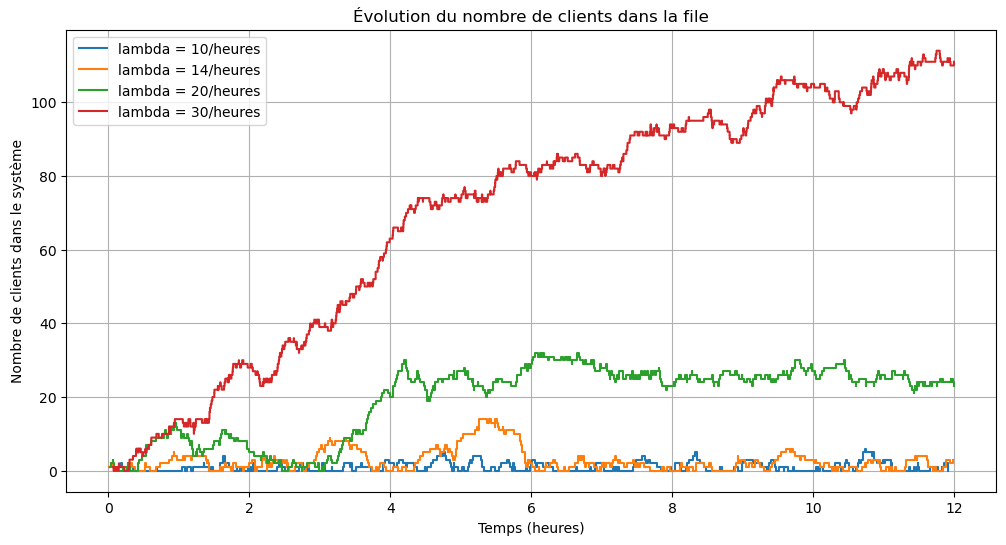

In [41]:
## Donnez votre code ici
np.random.seed(seed=13)

lambdas = [10, 14, 20, 30]  # arrivées/heure
mu = 20  # départs/heure
d = 12   # durée d'observation en heures

# Stockage des résultats
all_data = []

# Tracé
plt.figure(figsize=(12, 6))

for lam in lambdas:
    queue = fileMM1(lam, mu, d)
    evol = evolution(queue)

    # Stockage pour DataFrame
    df = pd.DataFrame({
        'lambda': lam,
        'mu': mu,
        'temps': evol['temps'],
        'nb_clients': evol['nb_clients']
    })
    all_data.append(df)

    # Affichage du graphe
    plt.step(evol['temps'], evol['nb_clients'], where='post', label=f"lambda = {lam}/heures")

plt.xlabel("Temps (heures)")
plt.ylabel("Nombre de clients dans le système")
plt.title("Évolution du nombre de clients dans la file")
plt.legend()
plt.grid(True)
plt.show()

# Fusion des DataFrames
resultats = pd.concat(all_data, ignore_index=True)


**Commentaires :** <span style="color:red">Donnez vos commentaires ici</span>

In [42]:
Pour 10 entrées par heures (lambda = 10/h, courbe bleu) :
    La file reste stable et on retrouve très peu de clients dans le système.
    Le système est largement capable de suivre la demande. On a donc un équilibre.

Pour 14 entrées par heures (lambda = 14/h, courbe orange) :
    On observe dees petites flucutations ce qui signifie que la file devient un peu plus chargée mais cela reste 
    globalement stable.
    On peut monter jusqu'à 10-15 clients dans la file mais le serveur rattrape rapidement.

Pour 20 entrées par heures (lambda = 20/h, courbe verte) :
    Ici on est dans le cas où le nombre d'arrivée par heure est égale au nombre de sortie par heure ce qui met 
    en tension le serveur. La file oscille et parfois le nombre de client dans la file peut ne pas redescendre car
    le serveur ne peut pas traiter suffisament vite les entrées.
    Ce système est donc très sensible aux fluctuations aléatoires.

Pour 30 entrées par heures (lambda = 30/h, courbe rouge) :
    Ici le nombre de clients dans la file ne fait que augmenter, le seveur n'arrive plus à rattraper le retard.


SyntaxError: invalid syntax (2531509928.py, line 1)

Soit $\rho = \lambda / \mu$ la proportion de temps le serveur est occupé, e.g. :
| $\lambda$ | $\mu$ | $\rho$ |
| -- | -- | -- |
| 0.17 | 0.33 | 0.5 |
| 0.23 | 0.33 | 0.7 |
| 0.33 | 0.33 | 1 |
| 0.5 | 0.33 | 1.5 |

La théorie nous dit que dans le cas $\lambda < \mu$ il existe **la distribution stationaire** donnée par :
$$\forall i\in \mathbb{N}^*, \pi_i = \rho^i (1 - \rho)$$

c.à.d. la probabilité d'avoir $i$ clients dans le système.

Notons que dans le cas $\mu > \lambda$, $\rho > 1$ et par conséquent, $\rho^i (1 - \rho) < 0$. Il ne s'agit plus de la distirbution.

On peut estimer le temps que la file d'attente passe dans chaqun des états car cette information est plus "stable" que l'évolution du nombre de clients calculée précedemment.

1. Calculez $\rho$ pour chaque paire de valeurs $\lambda$ et $\mu$, utilisée dans la question précédente. 
2. Calculez la distribution stationnaire pour chaque cas. 

```
def calc_stationary(rho, k=20):
    """
    Calcule la distribution stationaire.

    Keyword arguments:
    rho -- la proportion de temps le serveur est occupé
    k   -- le nombre d'états à considérer 

    Return:
    une liste contenant les probabilités (proportion de temps) de rester dans un état 
    """   
```

3. Calculez la durée des intervalles sans changement de l'état.
4. Calculez la proportion de temps que la file d'attente passe dans chaque état. 
5. Visualisez le résultat sous forme de diagramme en bâton en vous servant de [`plt.bar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)
6. Qu'est-ce qu'on peut dire de point de vue de convergence, en comparant les résultats avec la distirbution stationnaire ?

**Quelques astuces** : 
1. Afin de calculer le temps passé dans un état, il est nécessaire de considérer la longueur de l'intervalle pendant lequel le système reste sans changer. 

Reprenons l'exemple précédent. L'histogramme au-dessus représente le nombre de clients dans le système sur les intervals de temps. Un interval de temps est borné par deux évènements de changement de l'état du système. Notons que tout au long d'un interval donné, le nombre de clients présents dans le système reste le même. 

<img src="img/nb-clients-interval.png" width="800">

Pqr exemple, pour calculer la proportion de temps le système passe dans l'état 2, nous devons considérer les intervalles suivants : $[2,3], [7,8], [9,11]$ de la durée totale 4. Ensuite il faudra diviser cette durée totale par le temps total de l'observation du système, ici 15.

2. Pour calculer la différence entre deux éléments adjacents dans le tableau, i.e. $out[i] = a[i+1] - a[i]$, on peut utiliser la fonction [numpy.diff](https://numpy.org/doc/stable/reference/generated/numpy.diff.html). Pour le calcul du dernier intervalle, on peut append la durée totale de l'observation du système, i.e. le paramètre `d`.


In [62]:
# Donnez votre code ici

# calcul de rho
rho = [lam / mu for lam in lambdas]
print(rho)

[0.5, 0.7, 1.0, 1.5]


In [73]:
def calc_stationary(rho, k=20):
    """
    Calcule la distribution stationnaire pour une file M/M/1
    """
    if rho >= 1:
        return None  
    return [(1 - rho) * (rho ** i) for i in range(k)]


In [74]:
# Donnez votre code ici

# 
def durees_intervalles(evolution, d):
    temps = evolution['temps']
    nb_clients = evolution['nb_clients']
    intervalles = np.diff(np.append(temps, d))  # ajoute la fin de période
    return nb_clients, intervalles


In [75]:
# Donnez votre code ici

# calcul de la proportion de temps passé dans chaque état
def proportions_par_etat(nb_clients, intervalles, k=20):
    proportions = np.zeros(k)
    for etat, duree in zip(nb_clients, intervalles):
        if etat < k:
            proportions[etat] += duree
    return proportions / sum(intervalles)



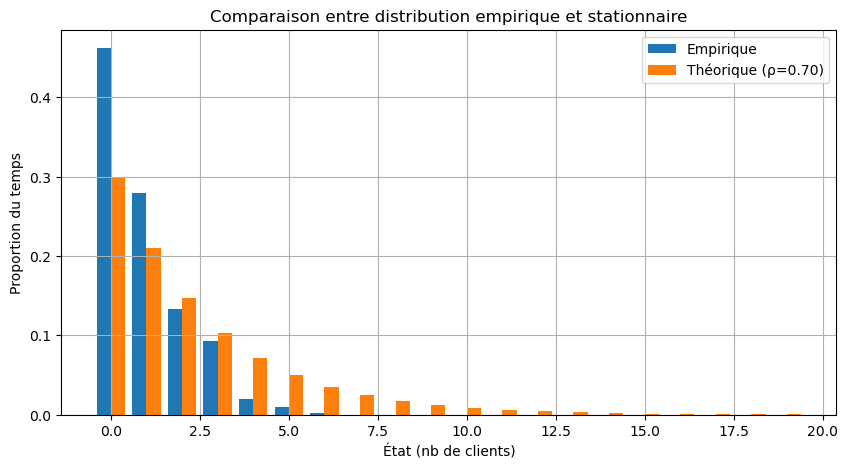

In [76]:
# Donnez votre code ici

# visualisation
def visualiser_comparaison(empirique, theorique, k=20, rho=None):
    x = np.arange(k)
    plt.figure(figsize=(10, 5))
    plt.bar(x - 0.2, empirique[:k], width=0.4, label='Empirique')
    if theorique:
        plt.bar(x + 0.2, theorique[:k], width=0.4, label=f'Théorique (ρ={rho:.2f})')
    plt.xlabel("État (nb de clients)")
    plt.ylabel("Proportion du temps")
    plt.title("Comparaison entre distribution empirique et stationnaire")
    plt.legend()
    plt.grid(True)
    plt.show()

lam = 14 / 60
mu = 20 / 60
d = 12 * 60

queue = fileMM1(lam, mu, d)
evo = evolution(queue)
nb_clients, intervalles = durees_intervalles(evo, d)
emp = proportions_par_etat(nb_clients, intervalles)
rho = lam / mu
th = calc_stationary(rho)

visualiser_comparaison(emp, th, k=20, rho=rho)

**Commentaires :** <span style="color:red">Donnez vos commentaires ici</span>

## Question 3. Formule de Little

Remarquons que le nombre moyen d'arrivées dans un intervalle de temps $t$ vaut alors $\lambda t$ et que le nombre de client qui part durant cet intervalle vaut en moyenne $\mu t$. L'intensité du traffic sur un serveur peut alors être mesuré par le rapport $\alpha = \frac{\lambda}{\mu}$. L'unité de mesure associée à cette grandeur est en général le [*Erlang*](https://fr.wikipedia.org/wiki/Erlang_(unit%C3%A9)).

Lorsque $\alpha > 1$, cela signifie qu'il y a en moyenne plus d'arrivées que de départs aux serveurs, donc que la file d'attente s'allonge et finira par saturer. 

Le cas qui nous intéresse est donc le cas $\alpha < 1$. Alors le système va se stabiliser ; on dit qu'il admet un régime stationnaire (voir votre cours de probabilités). Décrivons ce régime stationnaire :

<img src="img/queue-stationary.png" width="500">

Soit $\pi_i$ la probabilité d'être dans l'état $i$. Alors nous avons $\lambda \pi_i = \mu \pi_{i+1}$, ou encore $\pi_{i+1}=\alpha\pi_{i}$. Nous reconnaissons une suite géométrique de raison $\alpha < 1$. La solution est $\pi_i = \alpha^i(1-\alpha)$.

Soit $N$ le nombre de clients dans le système. Lorsque le système est stabilisé, $N$ a pour loi $(\pi_1, ..., \pi_k, ... )$.
Nous avons ainsi : $$\mathbb{E}(N) = \sum_i i\pi_i = \frac{\alpha}{1-\alpha}$$

De plus, dans une file $M/M/1$, il existe une relation fondamentale reliant les différentes grandeurs du système. Cette relation est la **formule de Little**. Soit $W$ le temps durant lequel un client reste dans le système. Alors nous avons :
$$\mathbb{E}(N) = \lambda \mathbb{E}(W)$$

Ceci signifie qu'en moyenne un client restant un laps de temps $\mathbb{E}(W)$ voit arriver derrière lui $\lambda\mathbb{E}(W)$
autres clients, avec $\lambda$ fréquence d'entrée des clients.

Ou autrement dit le paramètre $\lambda$ pourrait être approximé par : 
$$\lambda = \frac{\mathbb{E}(N)}{\mathbb{E}(W)}$$

### Estimation du temps moyen de présence d'un client dans le système

Estimez le *temps moyen de présence d'un client dans le système*, $\mathbb{E}(W)$, c'est-à-dire les temps moyens passés en attente et à être servi, autrement dit la différence de temps de départ et de temps d'arrivée.

```
def temps_moyens(queue):
    """
    Calcule le temps moyen de présence de clients dans le système. 
    
    Keyword arguments:
    queue -- dictionnaire contenant les temps des arrivées et départs de clients

    Return:
    Le temps moyen
    """
```

In [77]:
## Donnez votre code ici
def temps_moyens(queue):
    arr = queue['arrivees']
    dep = queue['departs']
    
    n = min(len(arr), len(dep)) 
    temps_total = np.sum(dep[:n] - arr[:n])
    return temps_total / n

lam = 14 / 60  
mu = 20 / 60
d = 12 * 60  

queue = fileMM1(lam, mu, d)
W = temps_moyens(queue)
print(f"Temps moyen de présence dans le système (E[W]) : {W:.2f} minutes")

Temps moyen de présence dans le système (E[W]) : 11.99 minutes


### Estimation du nombre moyen de clients dans le système

Estimez le nombre moyen de clients $\mathbb{E}(N)$ dans le système en vous servant de résultats de l'estimation du nombre de clients obtenue avec la fonction `evolution(queue)`. Pensez à prendre en compte la durée pendant laquelle on a ce nombre de clients dans le système.

Reprenons l'exemple précédent.  

<img src="img/nb-clients-interval.png" width="800">


Pour illustrer l'importance de la notion de temps, considérons 2 exemples extrêmes : 

* Le système $A$ est observé pendant 60 minutes. Un client est arrivé au bout de la première minute, i.e. le temps de son arrivée est 1. Il est parti une minute après, i.e. son temps de départ est 2. 
* Le système $B$ est observé pendant 60 minutes. Un client est arrivé au bout de la première minute, i.e. le temps de son arrivée est 1. Il est parti 58 minutes après, i.e. son temps de départ est 59.

Dans les deux cas ($A$ et $B$) il y avait une arrivée et un départ. Est-ce que pour autant le nombre moyen de clients dans le système est le même ?

Dans le premier cas, le client est servi presque instantanément et le reste du temps le système est vide. Donc, en moyenne on pourrait dire que le nombre de client est $1/60 \approx 0.017$ (proche de 0). 

Dans le deuxième cas, le service du client a pris presque tout le temps d'observation. On pourrait même dire qu'il y avait toujours qn. Donc, en moyenne le nombre de client est $58/60 \approx 0.97$ (proche de 1). 

Implémentez la fonction suivante :

```
def nombre_moyens(evol):
    """
    Calcule le nombre moyen de clients dans le système. 
    
    Keyword arguments:
    evol -- dictionnaire contenant les instants de temps et nombre de clients correspondant

    Return:
    Le nombre de clients moyen
    """
```

**Quelques astuces :**
1. Afin de calculer la différence entre deux éléments adjacents dans le tableau, i.e. $out[i] = a[i+1] - a[i]$, on peut utiliser la fonction [numpy.diff](https://numpy.org/doc/stable/reference/generated/numpy.diff.html)

In [79]:
## Donnez votre code ici
def nombre_moyens(evol, d):

    temps = evol['temps']
    nb_clients = evol['nb_clients']

    # Durée de chaque intervalle
    intervalles = np.diff(np.append(temps, d))
    
    # Moyenne pondérée par la durée passée dans chaque état
    E_N = np.sum(nb_clients * intervalles) / np.sum(intervalles)
    return E_N


### Application

Estimez le nombre moyen de clients dans le système ainsi que le temps de présence d'un client dans le système après 12 heures de fonctionnement en prenant les valeurs de $\lambda$ et $\mu$ des questions précédentes. On peut se limiter par les cas convergents. Retrouvez-vous la formule de Little ? Commentez.

In [80]:
## Donnez votre code ici
# Paramètres en minutes⁻¹
lam = 14 / 60
mu = 20 / 60
d = 12 * 60 

# Simulation
np.random.seed(10)
queue = fileMM1(lam, mu, d)
evo = evolution(queue)

# Estimations
E_W = temps_moyens(queue)
E_N = nombre_moyens(evo, d)

# Lambda estimé via Little
lambda_little = E_N / E_W

# Affichage
print(f"λ (théorique)       : {lam:.4f} clients/minute")
print(f"E[N] (nb clients moy): {E_N:.2f}")
print(f"E[W] (temps moyen)   : {E_W:.2f} minutes")
print(f"λ (via Little)       : {lambda_little:.4f} clients/minute")


λ (théorique)       : 0.2333 clients/minute
E[N] (nb clients moy): 2.57
E[W] (temps moyen)   : 9.35 minutes
λ (via Little)       : 0.2746 clients/minute


**Conclusion / commentaires :** <span style="color:red">Donnez vos commentaires ici</span>

In [ ]:
Pour ρ = λ / μ = 14 / 20 = 0.7 < 1, le système est stable, donc on s’attend à ce que les estimations convergent.

On constate que E[N] ≈ λ × E[W], ce qui confirme la formule de Little expérimentalement.

Des petites différences peuvent apparaître à cause de la variabilité aléatoire de la simulation, 
mais elles deviennent négligeables avec un temps d’observation assez long.

### Temps d'attente

Nous pouvons affiner un peu l'étude en étudiant aussi le temps passé à attendre dans la file avant d'être servi que nous noterons $W_a$ ou le nombre moyen d'individus dans la file d'attente, non servis, que nous noterons $N_a$. Nous pouvons montrer que :
$$\mathbb{E}(W_a) = \mathbb{E}(W) - \frac{1}{\mu}$$
$$\mathbb{E}(N_a) = \lambda\mathbb{E}(W_a)$$